In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import genfromtxt
from diff_tvr import *

In [2]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

In [3]:
def get_reference(strain,x0,x1,dispx=0,dispy=30):
    
    plt.figure(figsize=(20,10))
    x = np.arange(0,180)

    px, py = segments_fit(x[x0:x1], strain[x0:x1], 1)
    slope = (np.diff(py)/np.diff(px))
    
    plt.subplot(2,3,1)
    plt.plot(x, strain,label='actual strain')
    plt.plot(px, py, '-or')
    plt.title('Linear fit')

    x_lin = np.arange(px[0],px[1])
    y_lin = slope*x_lin - py[0]
    plt.legend()

    plt.subplot(2,3,2)
    bias = slope*px[0] - py[0]
    strain_ref = np.arange(0,180)*slope - bias
    strain_ref[np.where(strain_ref < 0)[0]] = 0
    plt.plot(strain,label='actual strain')
    plt.plot(strain_ref)
    plt.title('Piecewise linear strain reference')
    plt.legend()
    
    dstrain = np.diff(strain_ref)
    b, a = signal.butter(1, 0.1)
    dstrain_f = signal.filtfilt(b, a, dstrain, padlen=20)

    plt.subplot(2,3,4)
    plt.plot(dstrain[dispx:dispy])
    plt.plot(dstrain_f[dispx:dispy],label='filtered')
    plt.title('Strain rate reference')
    plt.legend()

    integrated_diff = np.cumsum(dstrain)
    integrated_difff = np.cumsum(dstrain_f)

    plt.subplot(2,3,5)
    plt.plot(strain[dispx:dispy],label='actual')
    plt.plot(integrated_diff[dispx:dispy],label='picewise linear')
    plt.plot(integrated_difff[dispx:dispy],label='filtered')
    plt.legend()
    plt.title('Strain reference')

    plt.subplot(2,3,3)
    plt.plot(strain,label='actual strain')
    plt.plot(integrated_diff,'--',label='piecewise linear')
    plt.plot(integrated_difff,'--',label='filtered')
    plt.legend()
    plt.title('Strain')
    
    plt.subplot(2,3,6)
    plt.plot(strain[:-1] - integrated_diff,label='piecewise linear')
    plt.plot(strain[:-1] - integrated_difff,label='filtered')
    plt.legend()
    plt.title('Strain residuals')
    
    plt.show()
    
    return integrated_difff, dstrain_f

### Student 1

In [4]:
student_1_strain_ref = np.zeros([12,179])
student_1_strain_rate_ref = np.zeros([12,179])

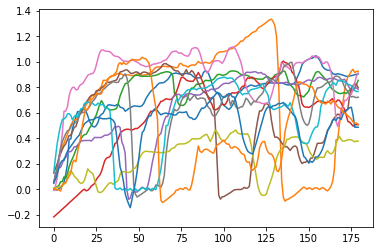

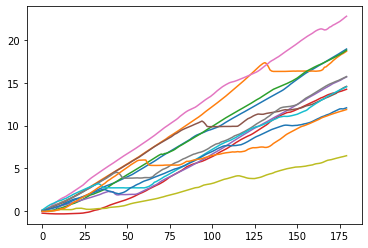

In [5]:
student_1_force = np.zeros([12,180])
student_1_strain = np.zeros([12,180])

for i in range(12):
    student_1_force[i,:] = genfromtxt('./data/student_1_force_'+str(i+1)+'.csv', delimiter=',')
    student_1_strain[i,:] = genfromtxt('./data/student_1_strain_'+str(i+1)+'.csv', delimiter=',')

for i in range(12):
    plt.plot(student_1_force[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_1_strain[i,:])
plt.show()
    

# plt.plot(force); plt.grid(); plt.title('Actual force'); plt.show()
# plt.plot(strain); plt.grid(); plt.title('Continuous strain (inferred by plant inversion)'); plt.show()

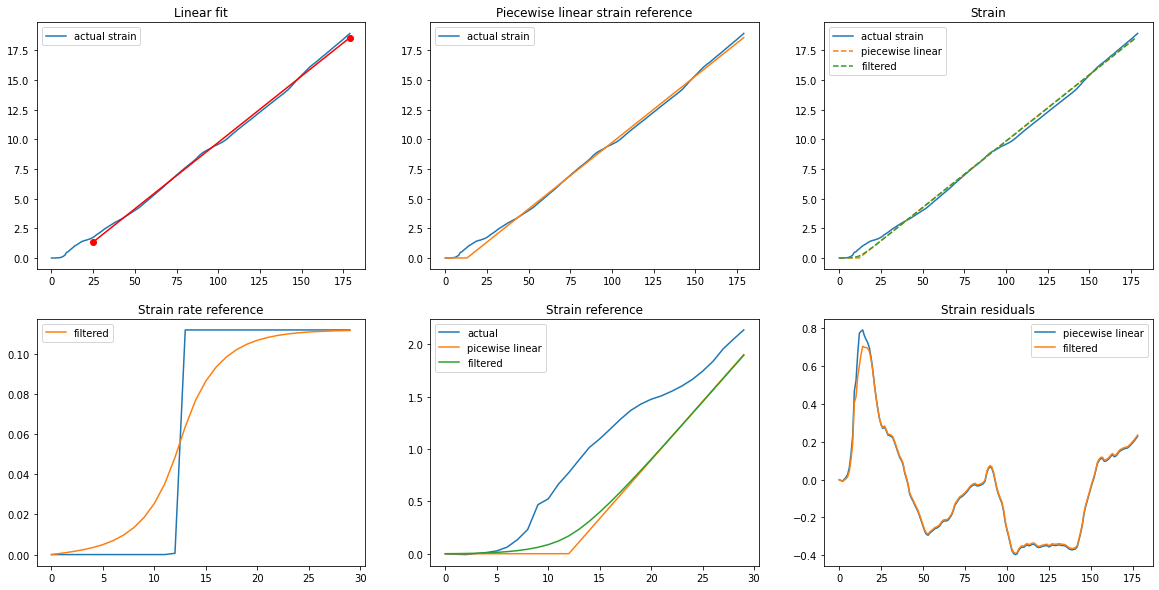

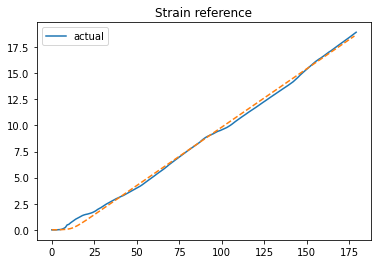

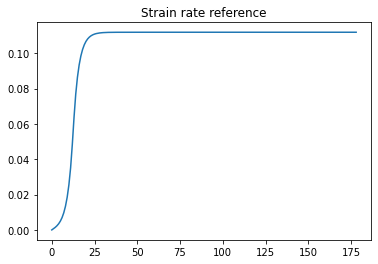

In [6]:
# Fit the linear segment of strain curve
cut = 0
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],25,180)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

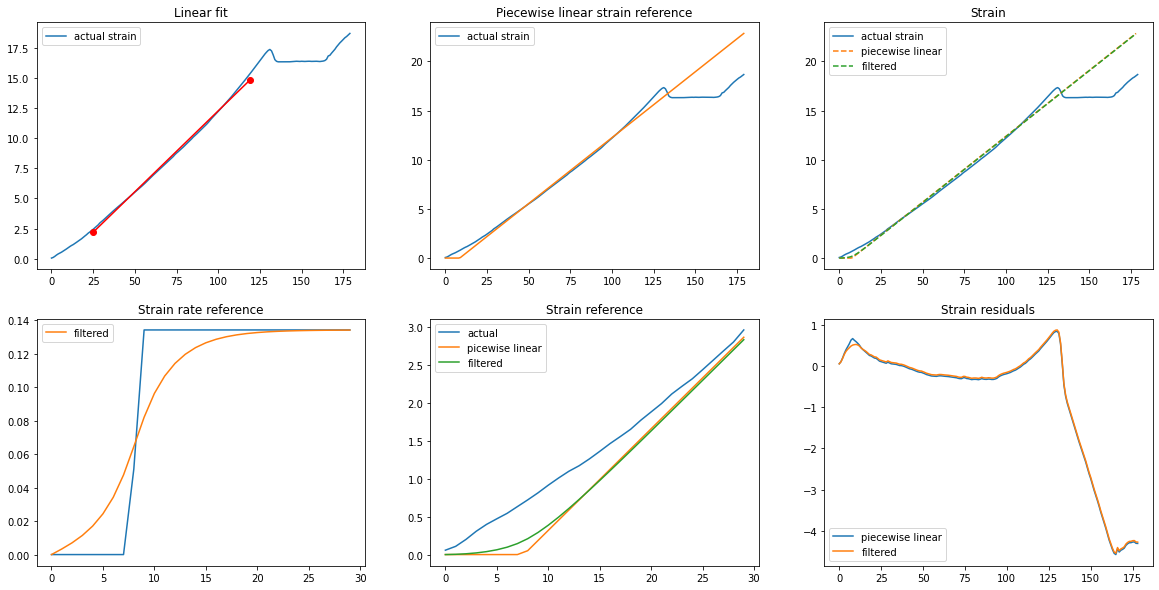

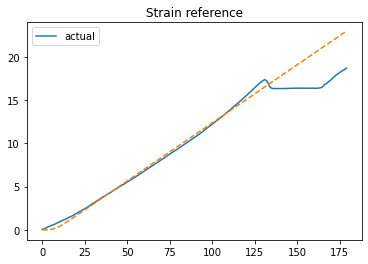

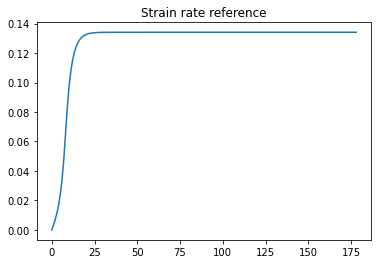

In [7]:
# Fit the linear segment of strain curve
cut = 1
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],25,120)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

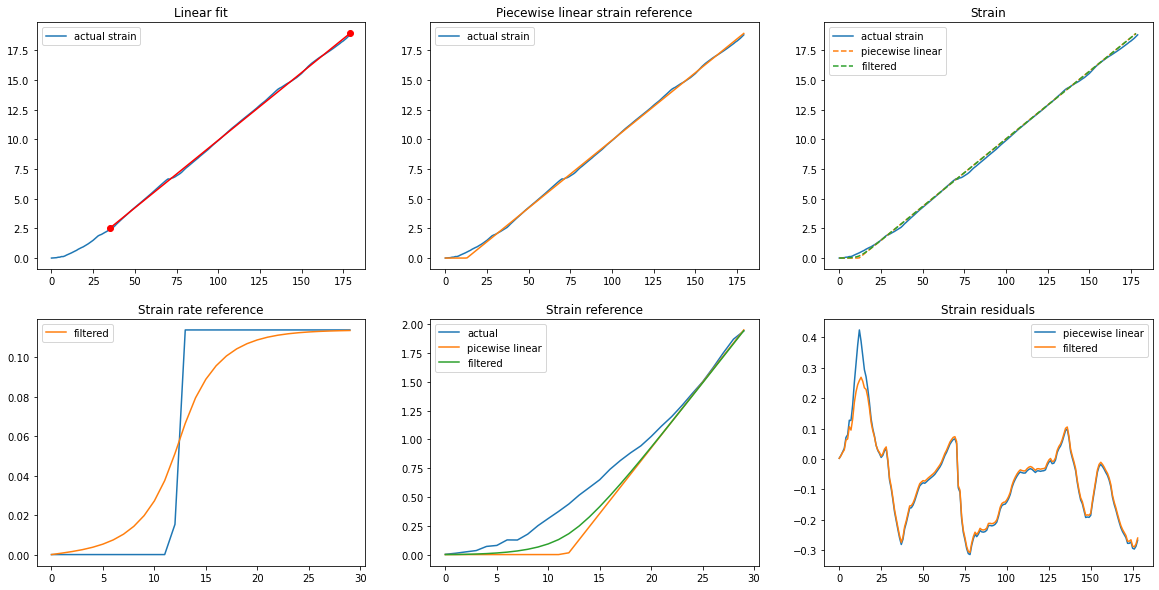

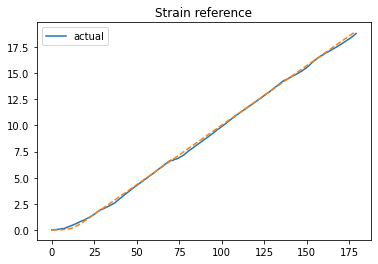

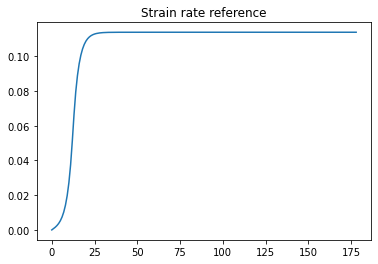

In [8]:
# Fit the linear segment of strain curve
cut = 2
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],35,180)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

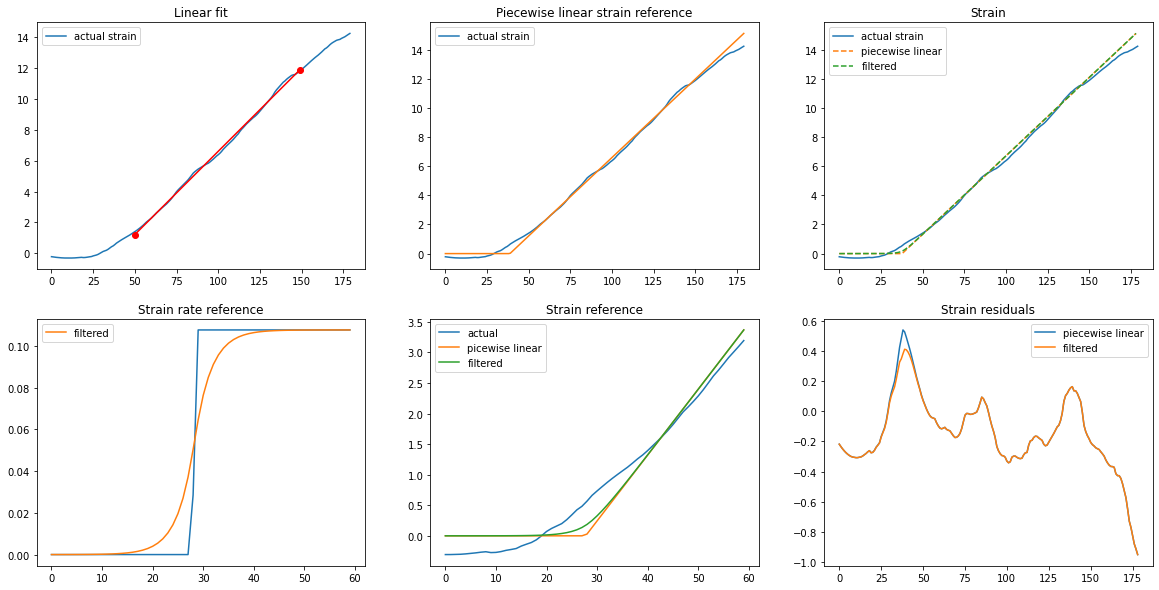

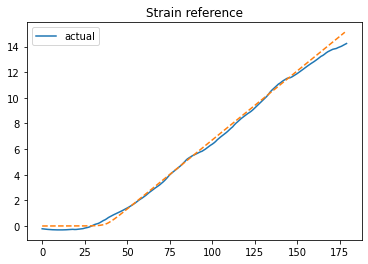

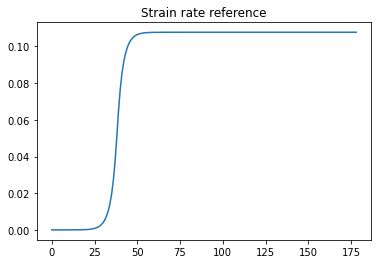

In [9]:
# Fit the linear segment of strain curve
cut = 3
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],50,150,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

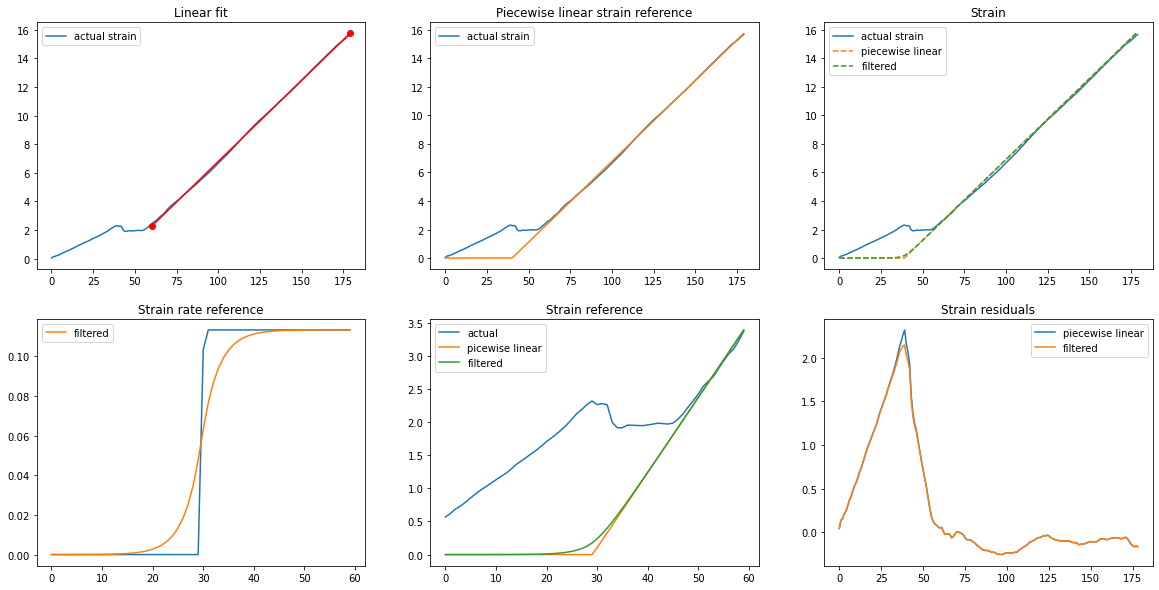

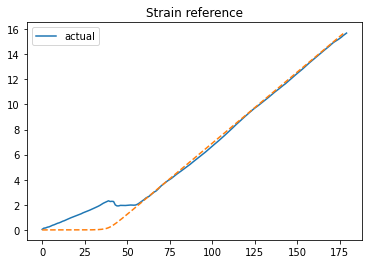

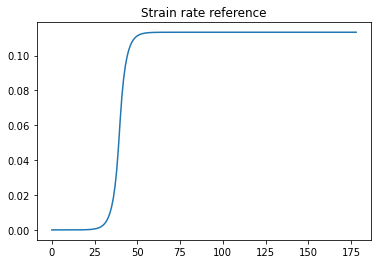

In [10]:
# Fit the linear segment of strain curve
cut = 4
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],60,180,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

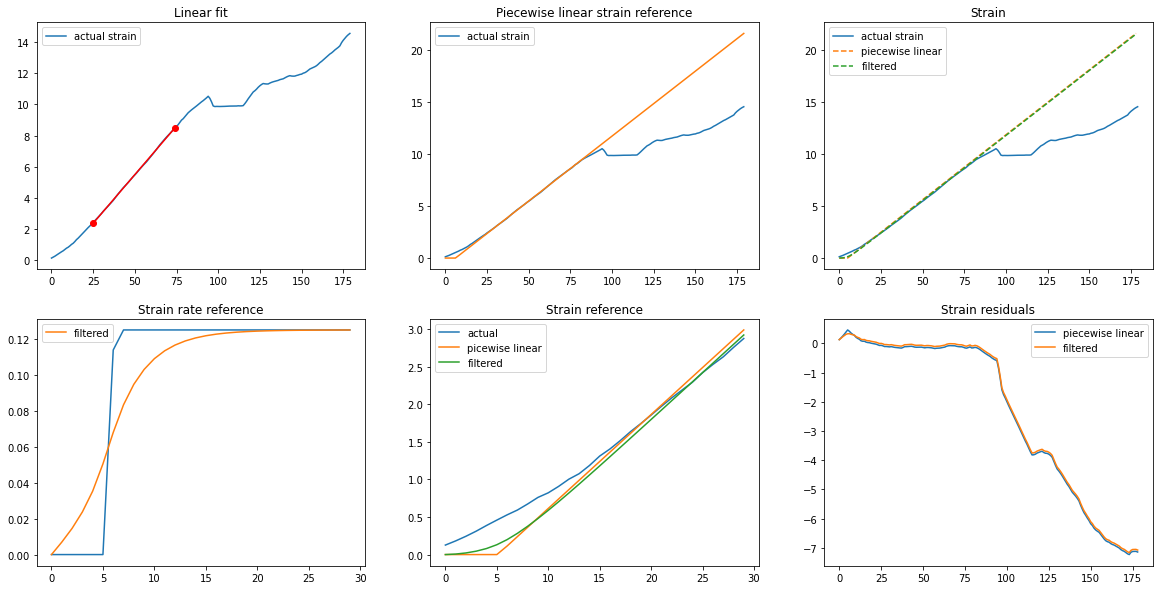

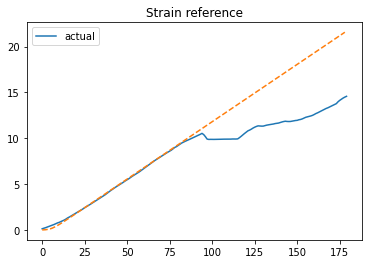

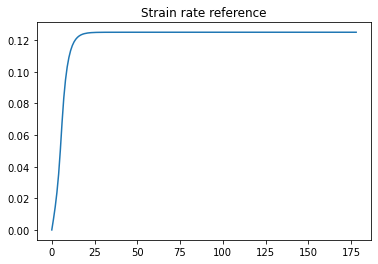

In [11]:
# Fit the linear segment of strain curve
cut = 5
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],25,75)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

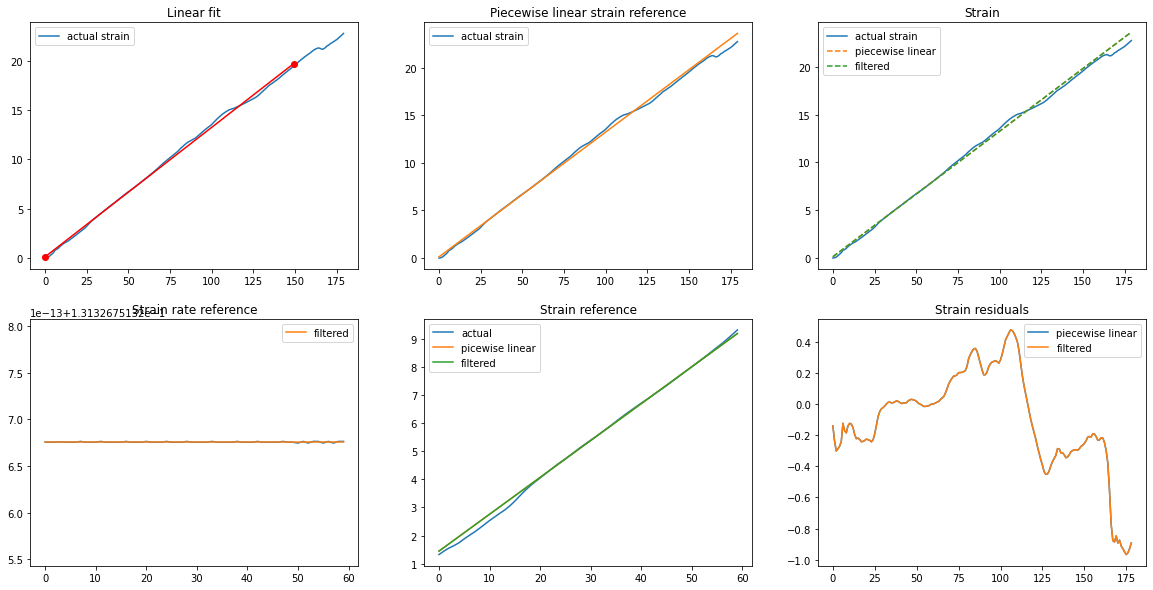

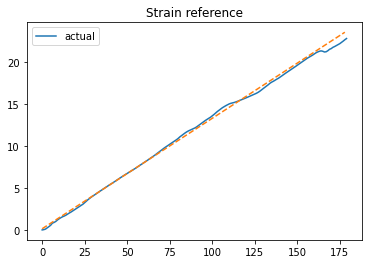

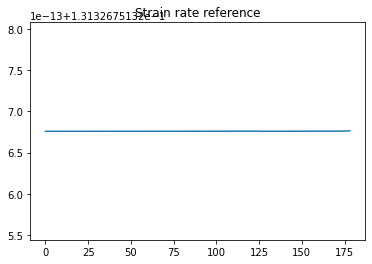

In [12]:
# Fit the linear segment of strain curve
cut = 6
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],0,150,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

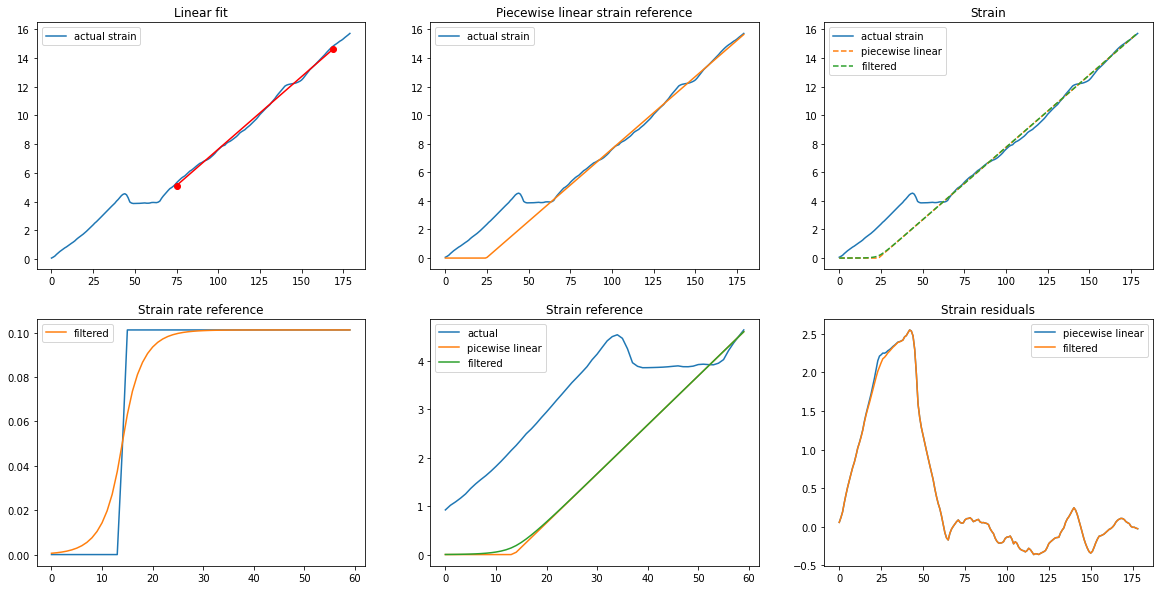

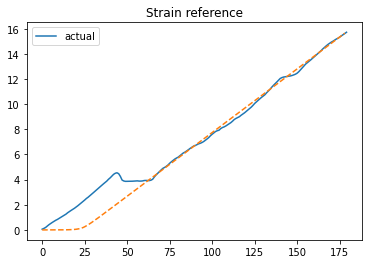

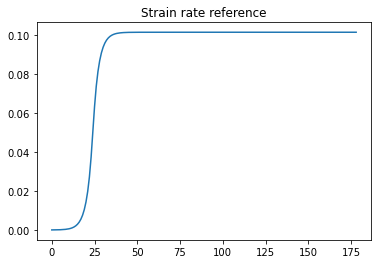

In [13]:
# Fit the linear segment of strain curve
cut = 7
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],75,170,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

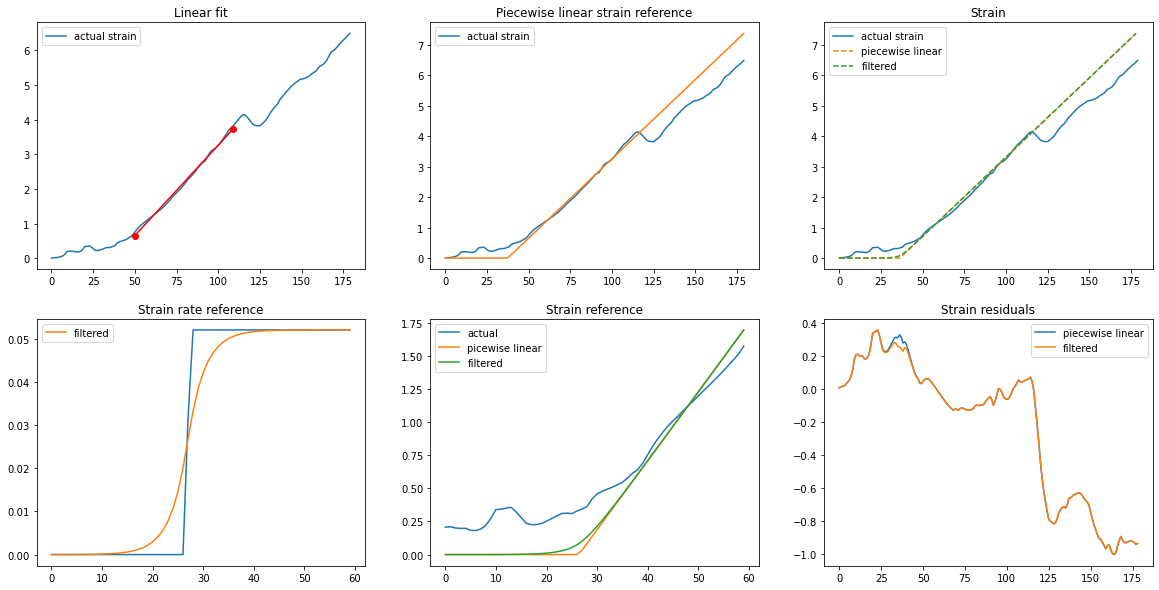

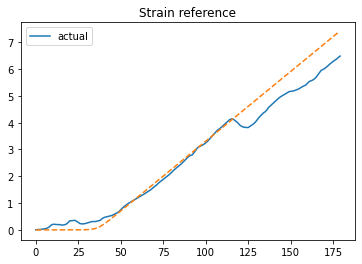

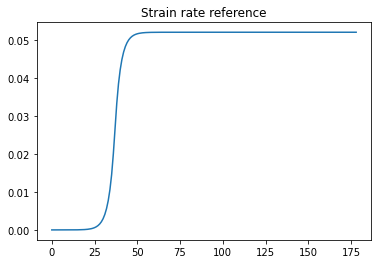

In [14]:
# Fit the linear segment of strain curve
cut = 8
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],50,110,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

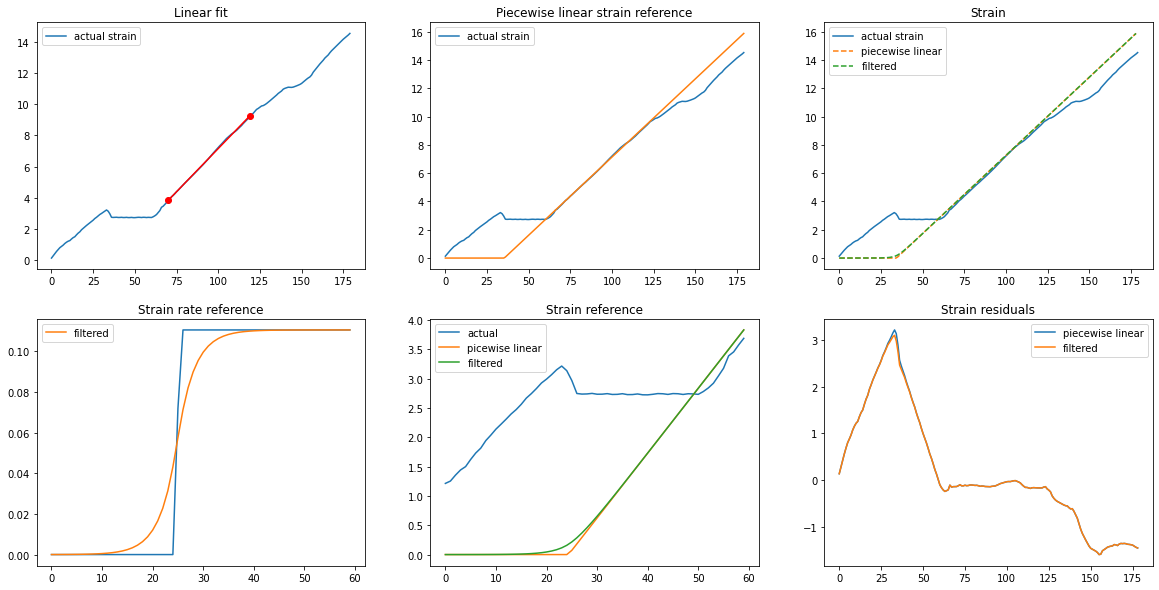

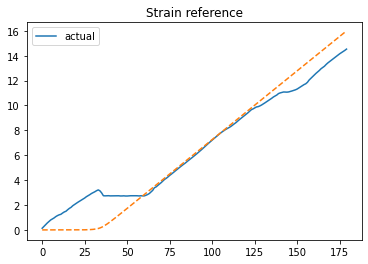

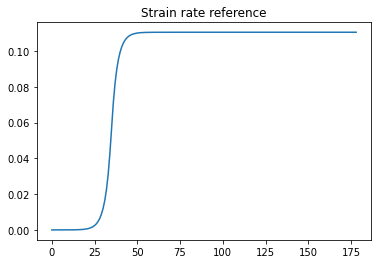

In [15]:
# Fit the linear segment of strain curve
cut = 9
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],70,120,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

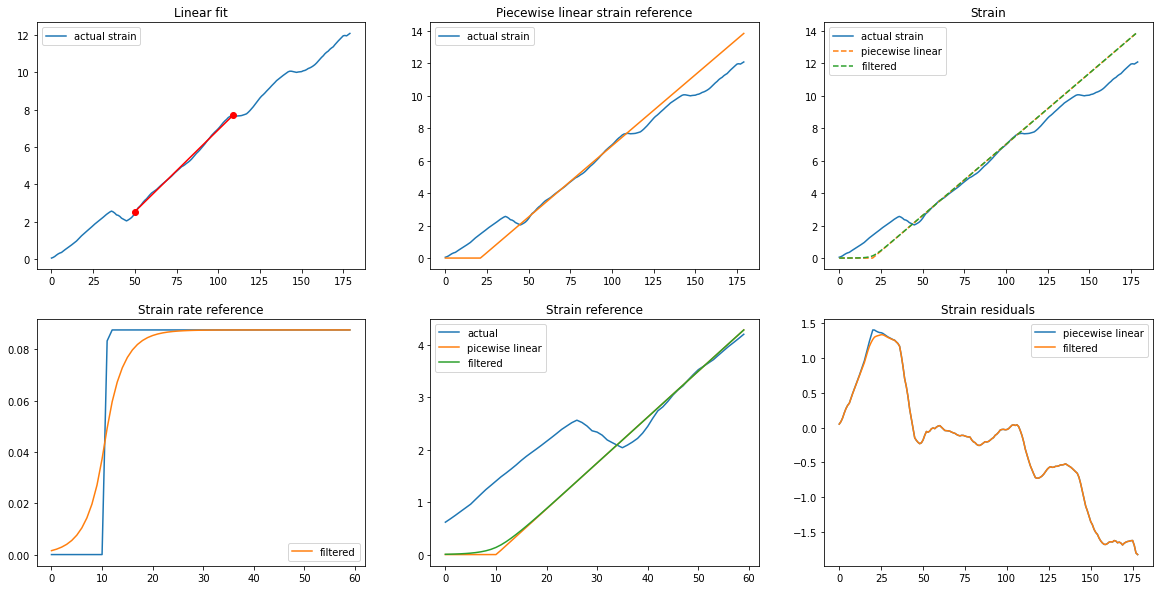

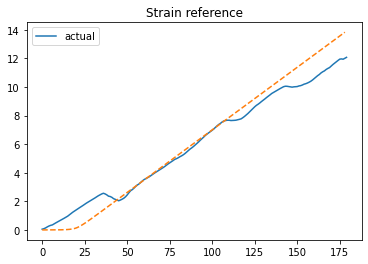

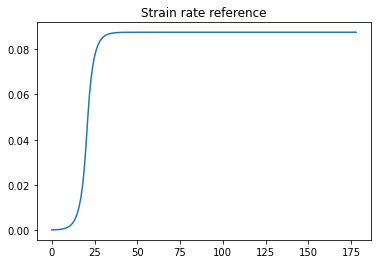

In [16]:
# Fit the linear segment of strain curve
cut = 10
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],50,110,10,70)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

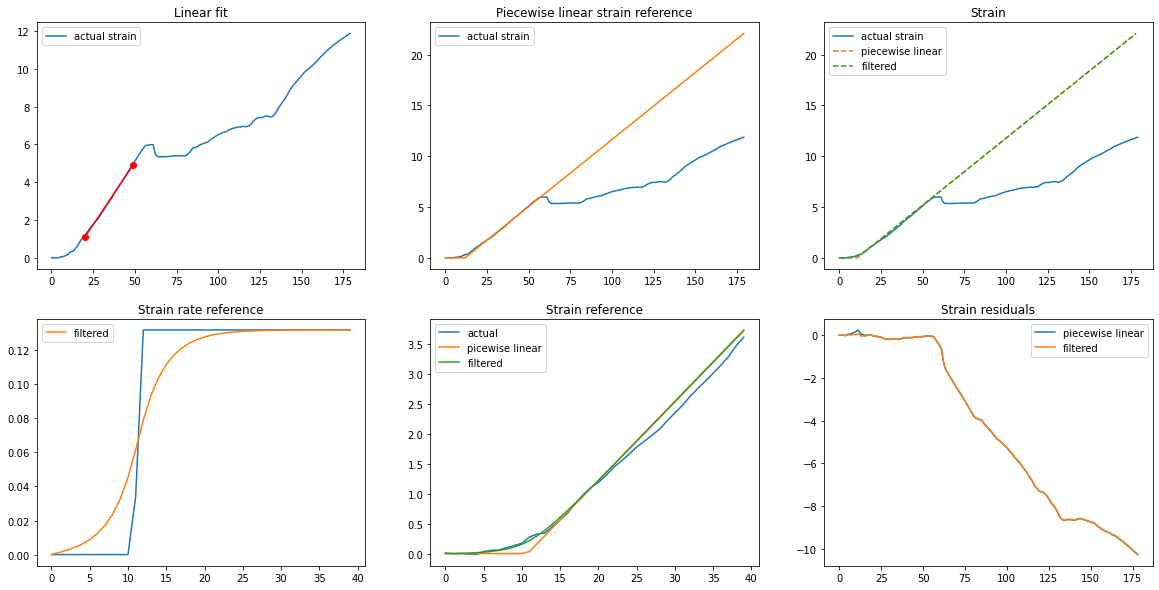

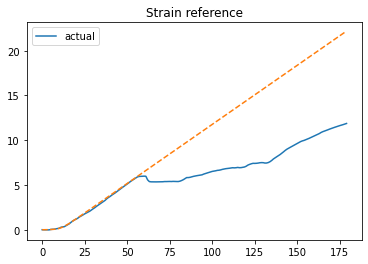

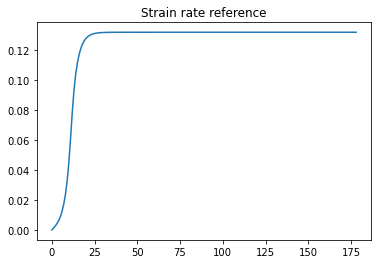

In [17]:
# Fit the linear segment of strain curve
cut = 11
strain_ref, strain_rate_ref = get_reference(student_1_strain[cut,:],20,50,0,40)

plt.plot(student_1_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_1_strain_ref[cut,:] = strain_ref
student_1_strain_rate_ref[cut,:] = strain_rate_ref

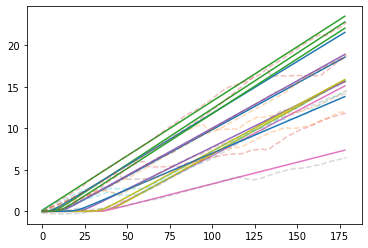

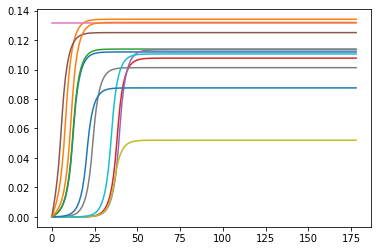

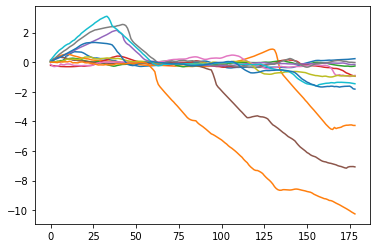

In [59]:
for i in range(12):
    plt.plot(student_1_strain_ref[i,:])
    plt.plot(student_1_strain[i,:],'--',alpha=0.3)
plt.show()

for i in range(12):
    plt.plot(student_1_strain_rate_ref[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_1_strain[i,:-1] - student_1_strain_ref[i,:])

### Student 2

In [19]:
student_2_strain_ref = np.zeros([12,179])
student_2_strain_rate_ref = np.zeros([12,179])

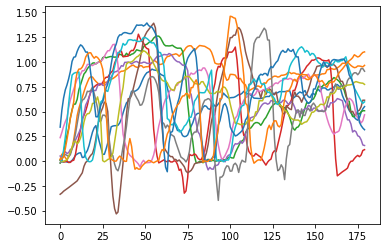

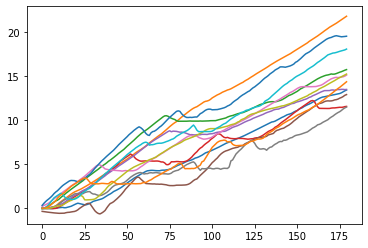

In [20]:
student_2_force = np.zeros([12,180])
student_2_strain = np.zeros([12,180])

for i in range(12):
    student_2_force[i,:] = genfromtxt('./data/student_2_force_'+str(i+1)+'.csv', delimiter=',')
    student_2_strain[i,:] = genfromtxt('./data/student_2_strain_'+str(i+1)+'.csv', delimiter=',')

for i in range(12):
    plt.plot(student_2_force[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_2_strain[i,:])
plt.show()
    

# plt.plot(force); plt.grid(); plt.title('Actual force'); plt.show()
# plt.plot(strain); plt.grid(); plt.title('Continuous strain (inferred by plant inversion)'); plt.show()

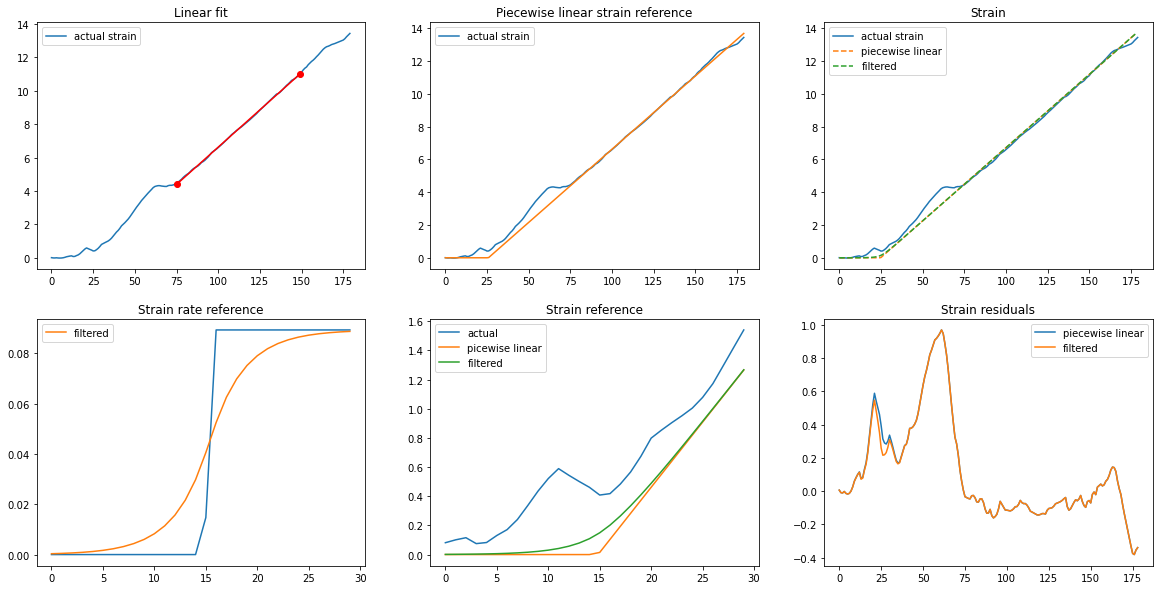

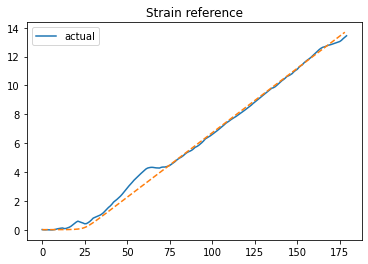

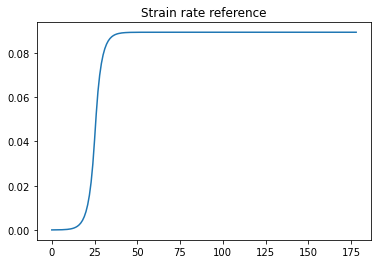

In [21]:
# Fit the linear segment of strain curve
cut = 0
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],75,150,10,40)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

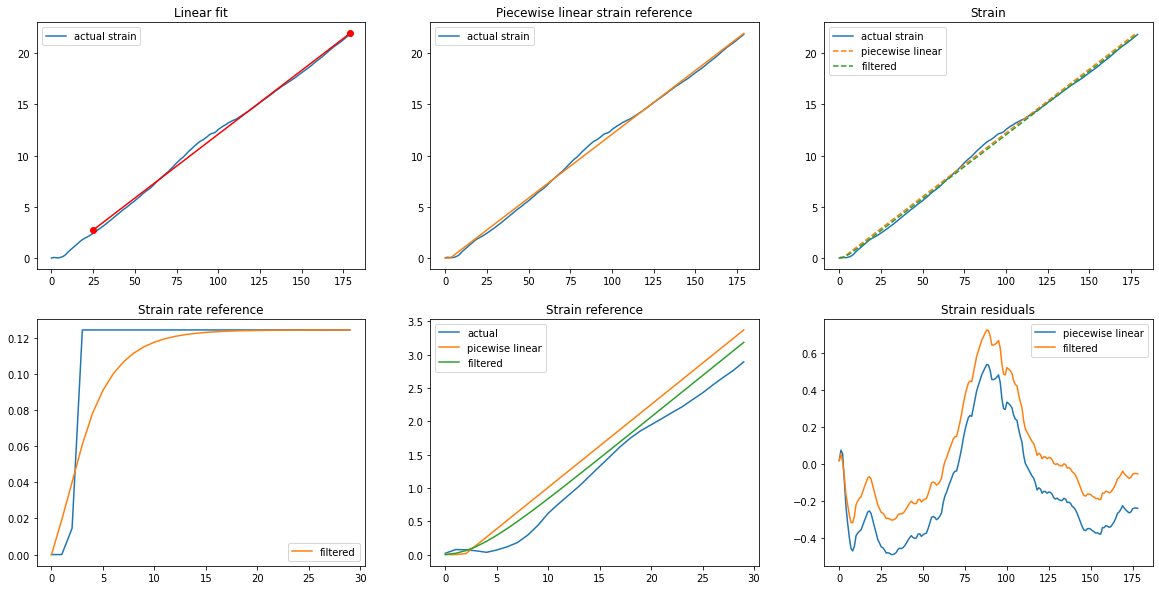

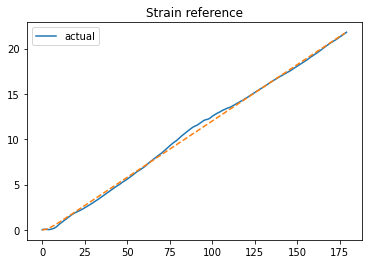

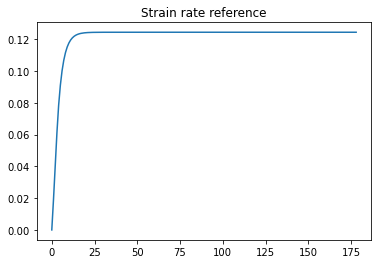

In [24]:
# Fit the linear segment of strain curve
cut = 1
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],25,180)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

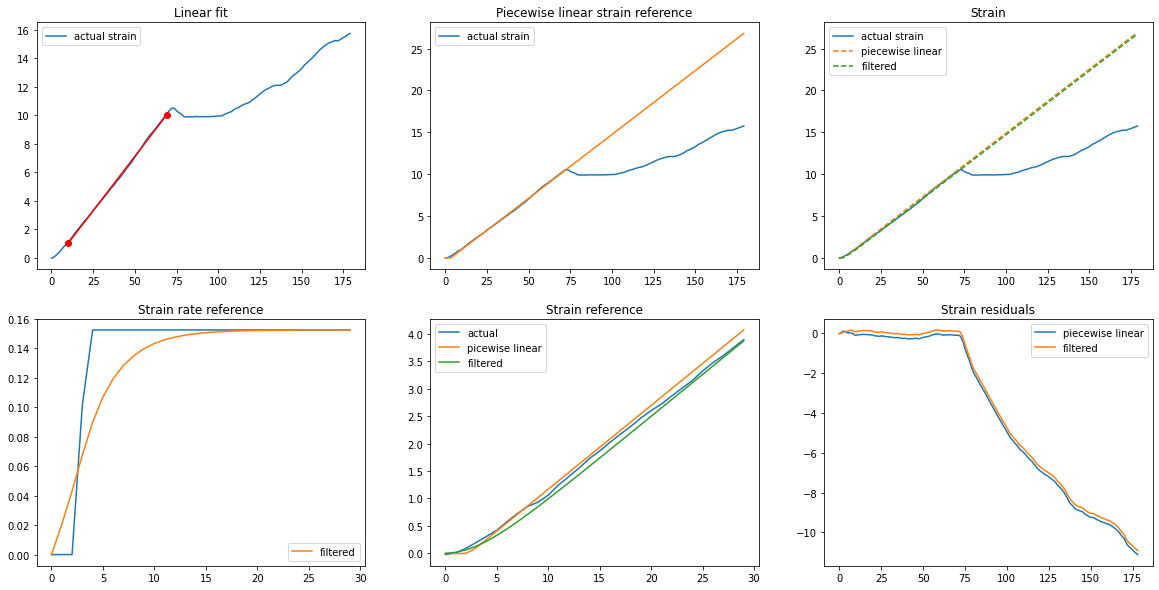

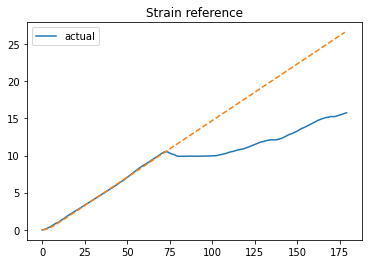

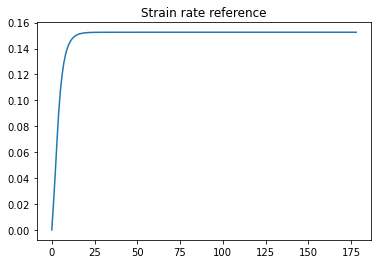

In [26]:
# Fit the linear segment of strain curve
cut = 2
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],10,70)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

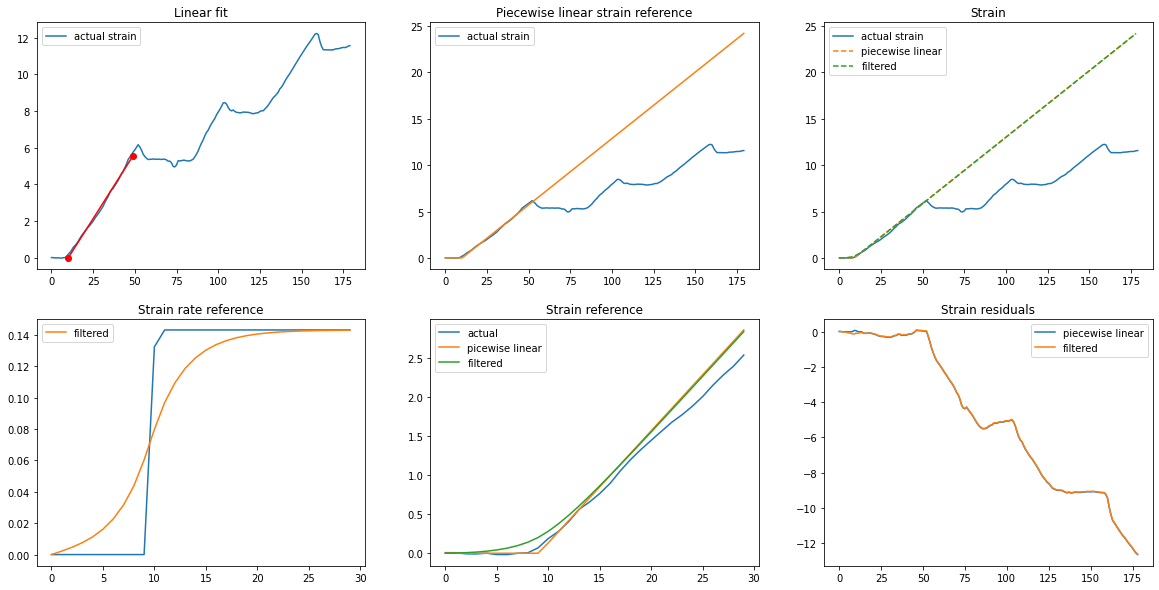

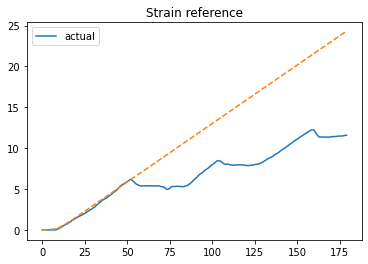

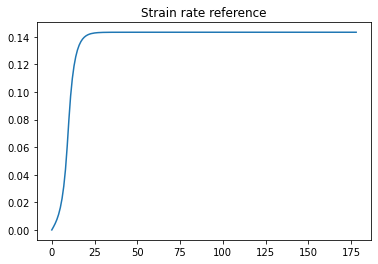

In [29]:
# Fit the linear segment of strain curve
cut = 3
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],10,50)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

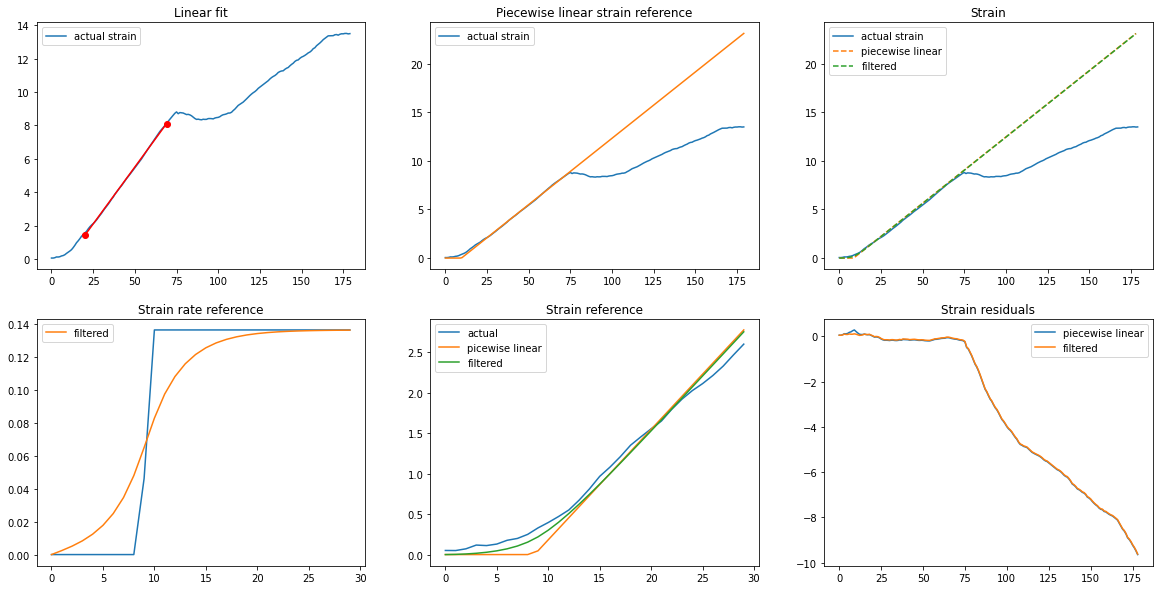

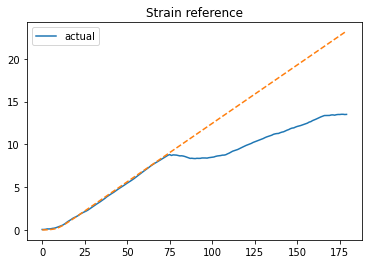

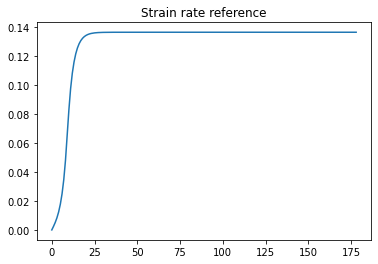

In [31]:
# Fit the linear segment of strain curve
cut = 4
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],20,70)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

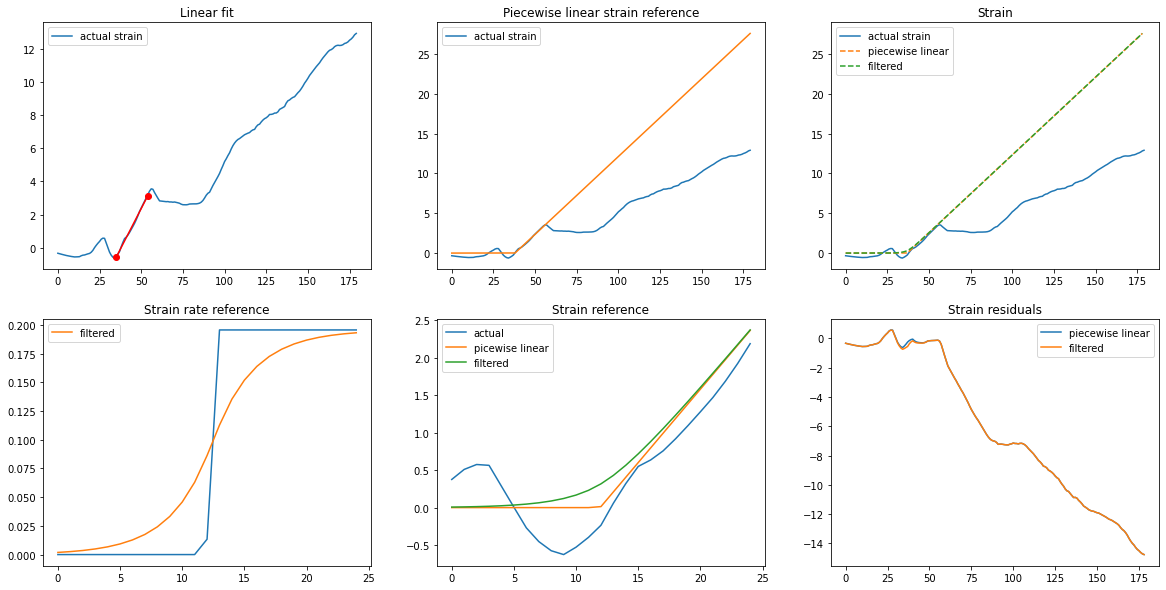

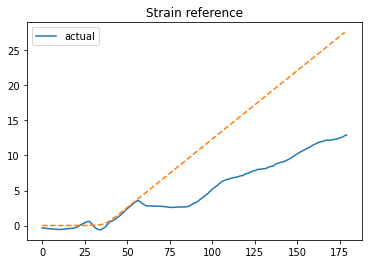

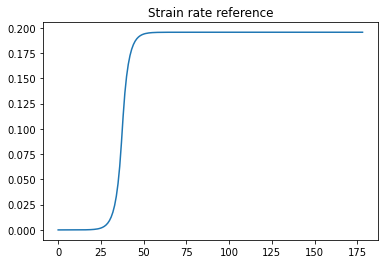

In [37]:
# Fit the linear segment of strain curve
cut = 5
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],35,55,25,50)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

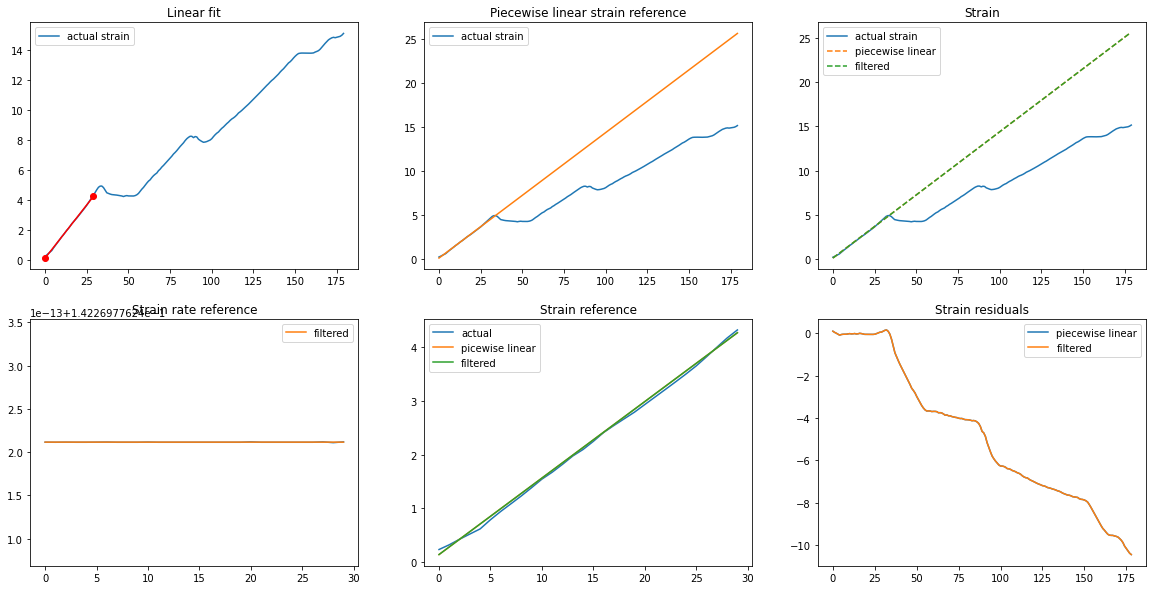

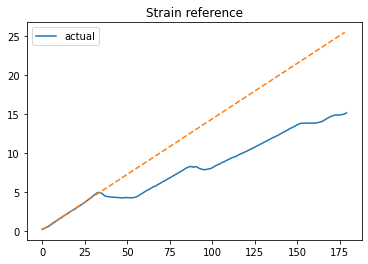

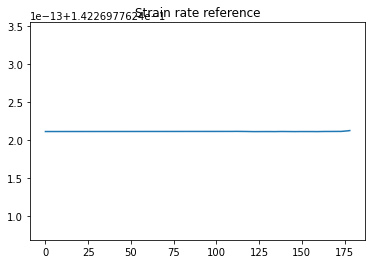

In [40]:
# Fit the linear segment of strain curve
cut = 6
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],0,30)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

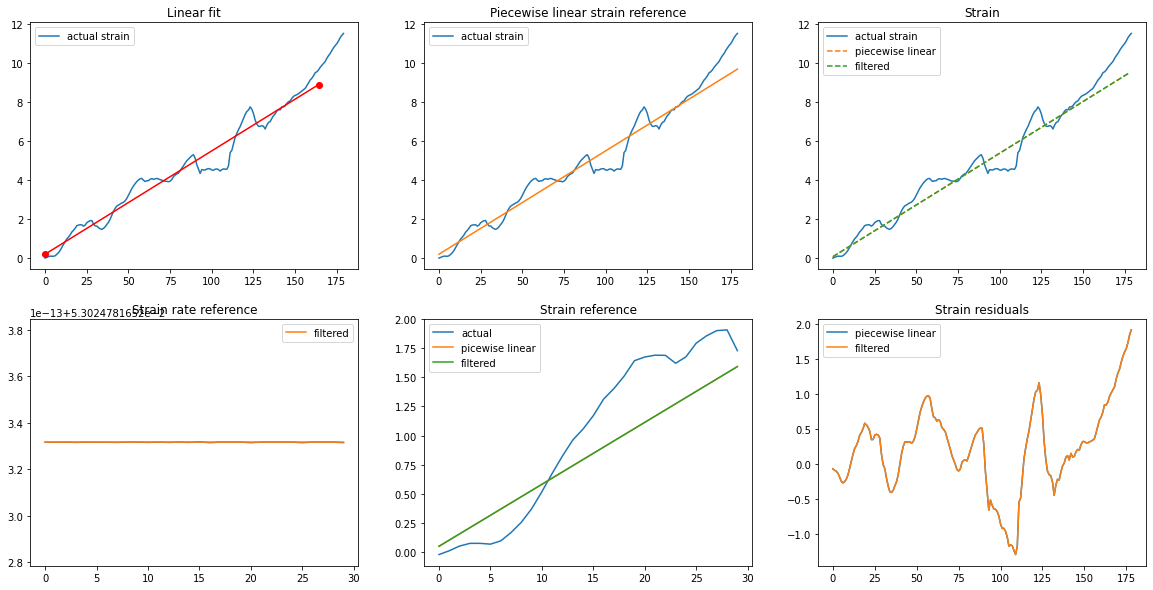

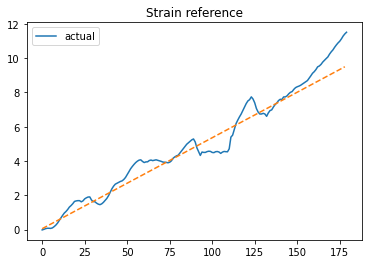

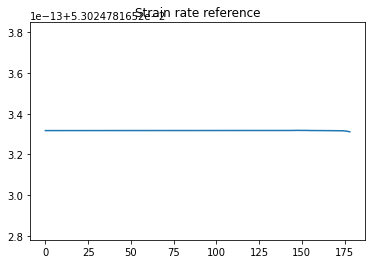

In [46]:
# Fit the linear segment of strain curve
cut = 7
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],0,165)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

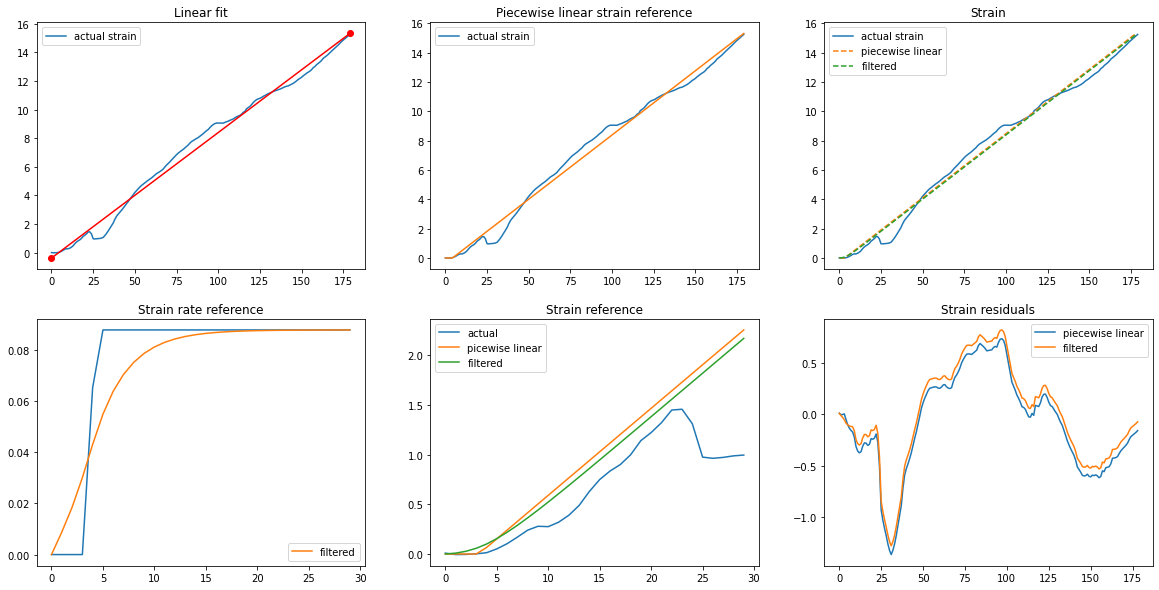

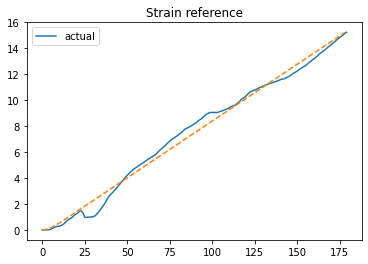

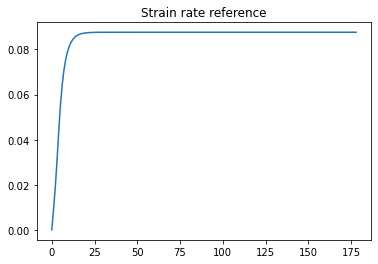

In [52]:
# Fit the linear segment of strain curve
cut = 8
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],0,180)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

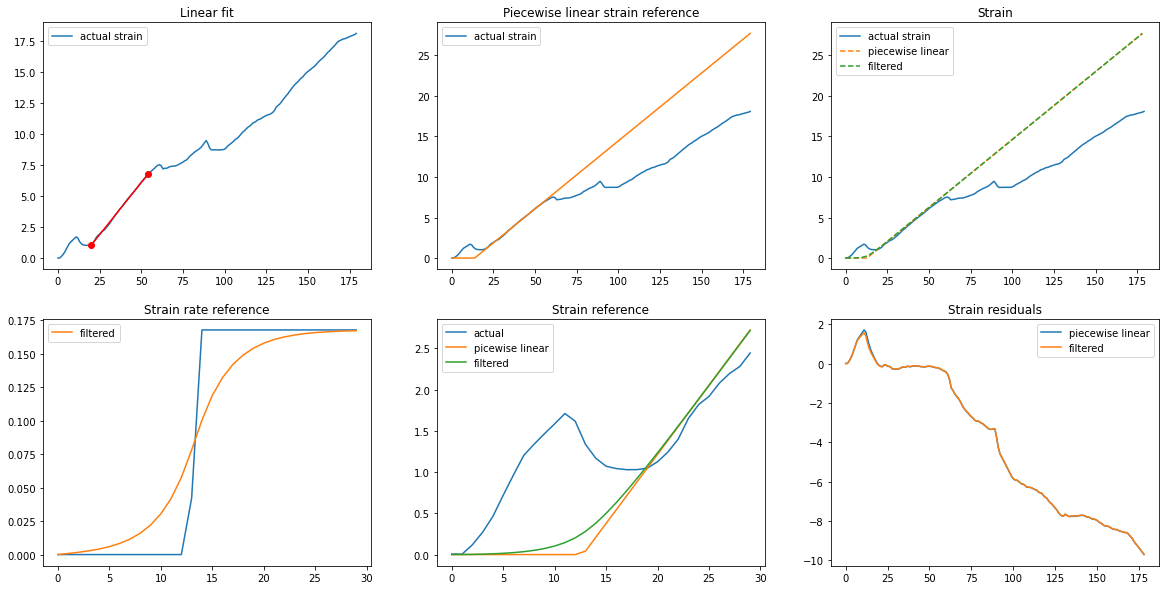

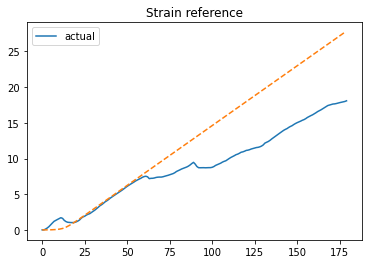

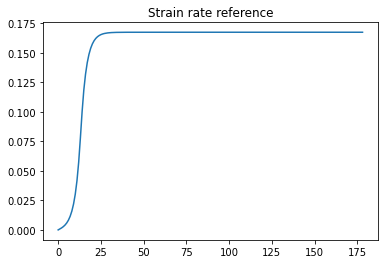

In [55]:
# Fit the linear segment of strain curve
cut = 9
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],20,55)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

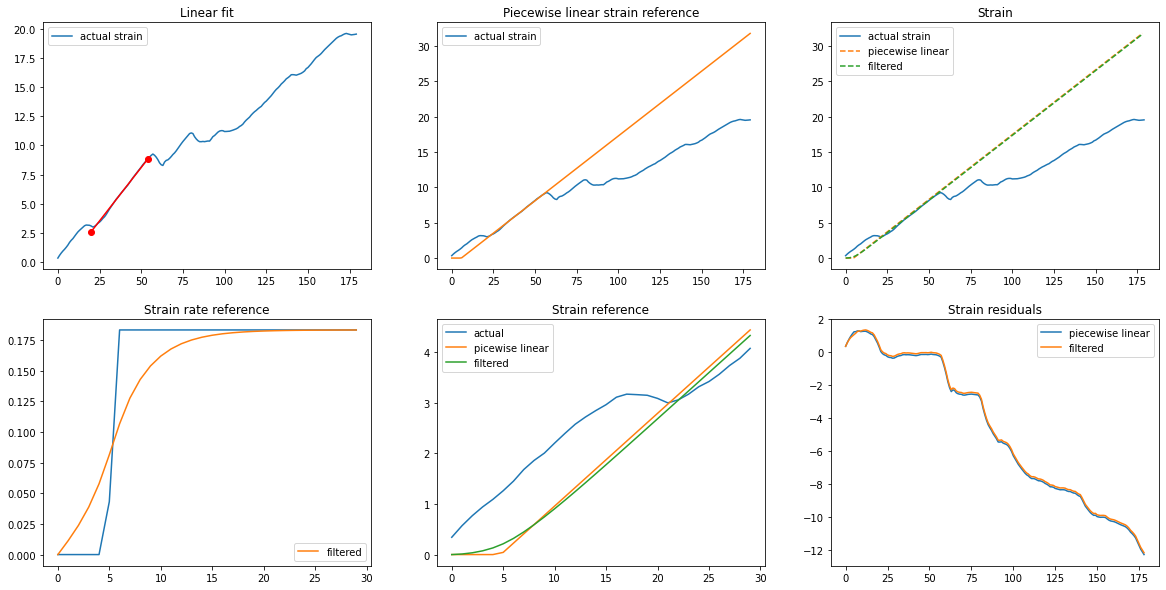

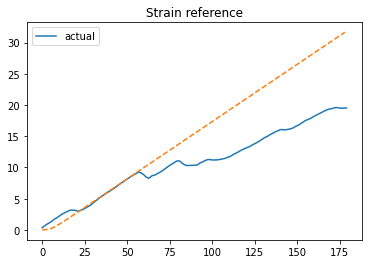

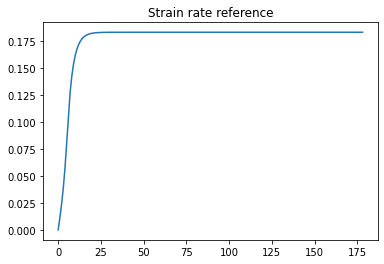

In [56]:
# Fit the linear segment of strain curve
cut = 10
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],20,55)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

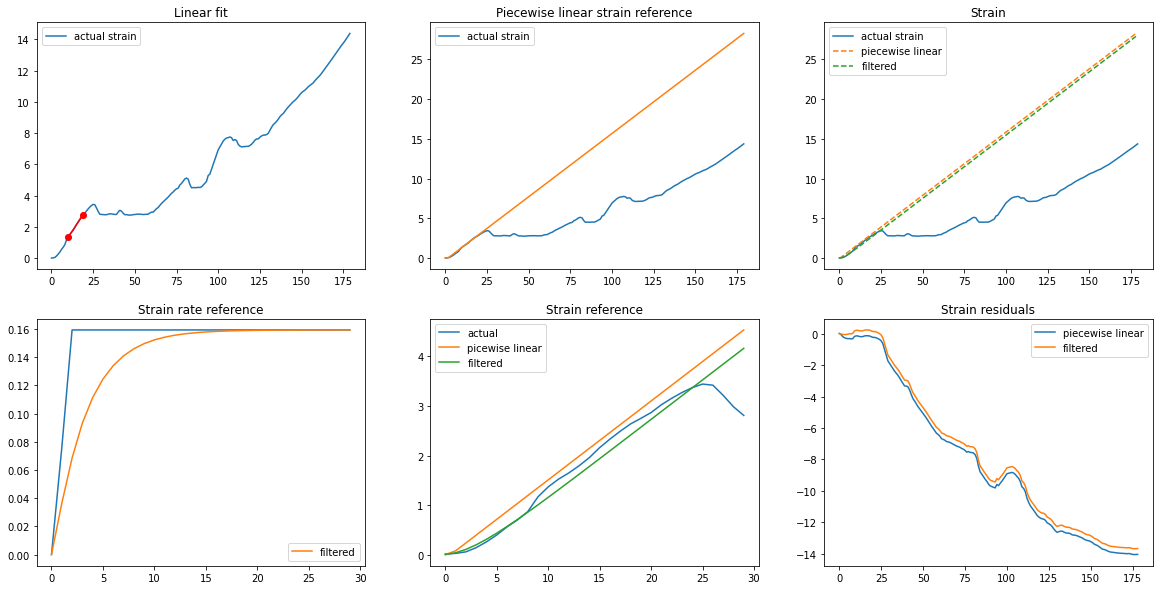

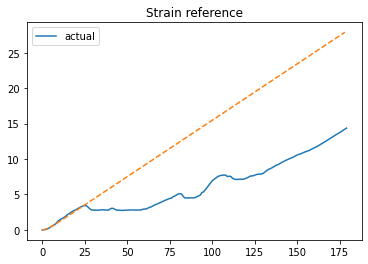

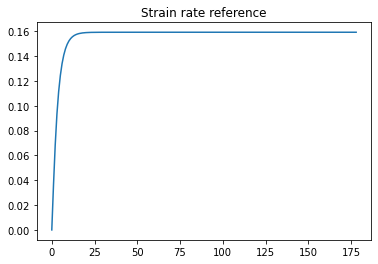

In [58]:
# Fit the linear segment of strain curve
cut = 11
strain_ref, strain_rate_ref = get_reference(student_2_strain[cut,:],10,20)

plt.plot(student_2_strain[cut,:],label='actual')
plt.plot(strain_ref,'--')
plt.title('Strain reference')
plt.legend()
plt.show()

plt.plot(strain_rate_ref)
plt.title('Strain rate reference')
plt.show()

student_2_strain_ref[cut,:] = strain_ref
student_2_strain_rate_ref[cut,:] = strain_rate_ref

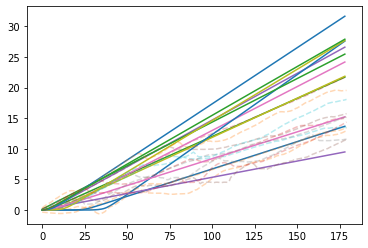

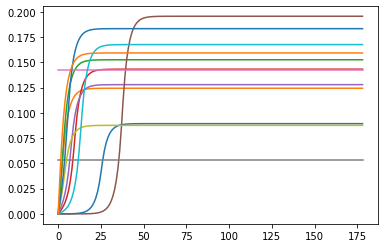

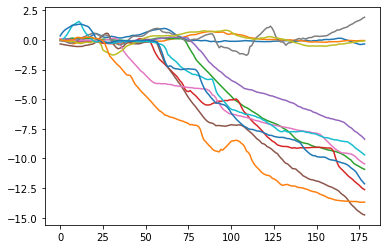

In [67]:
for i in range(12):
    plt.plot(student_2_strain_ref[i,:])
    plt.plot(student_2_strain[i,:],'--',alpha=0.3)
plt.show()

for i in range(12):
    plt.plot(student_2_strain_rate_ref[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_2_strain[i,:-1] - student_2_strain_ref[i,:])

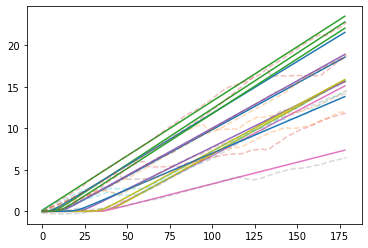

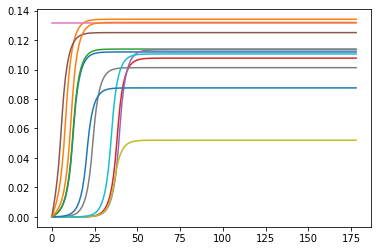

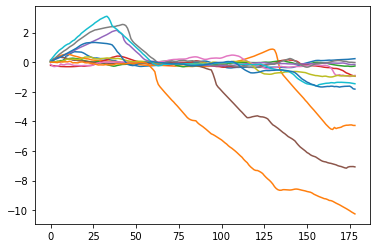

In [68]:
for i in range(12):
    plt.plot(student_1_strain_ref[i,:])
    plt.plot(student_1_strain[i,:],'--',alpha=0.3)
plt.show()

for i in range(12):
    plt.plot(student_1_strain_rate_ref[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_1_strain[i,:-1] - student_1_strain_ref[i,:])

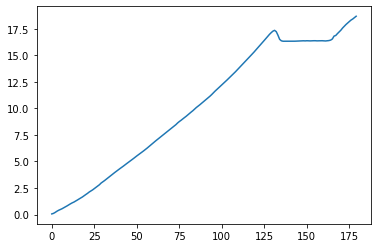

In [72]:
plt.plot(student_1_strain[1,:])

Text(0.5, 1.0, 'Linear fit')

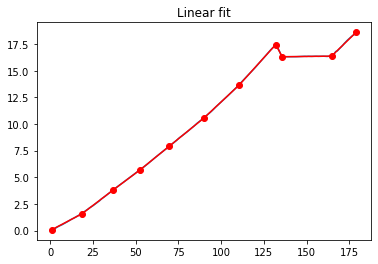

In [218]:
x = np.arange(1,180)
px, py = segments_fit(x[0:179], student_1_strain[1,0:179], 10)
slope = (np.diff(py)/np.diff(px))

plt.plot(x, student_1_strain[1,:179],label='actual strain')
plt.plot(px, py, '-or')
plt.title('Linear fit')

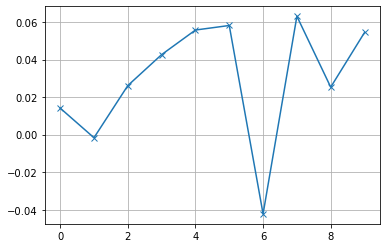

In [165]:
plt.plot(slope,'-x')
plt.grid()

In [178]:
indx = np.where(slope > 0.04)[0]
indx

array([3, 4, 5, 7, 9], dtype=int64)

In [ ]:
indx = []
for i in range(slope.shape[0]):
    if slope[i] > 0.04:
        

In [191]:
import numpy as np
from numpy.linalg import lstsq

ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0] 

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck 

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution) 
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

maximum iteration reached


Text(0, 0.5, 'Y')

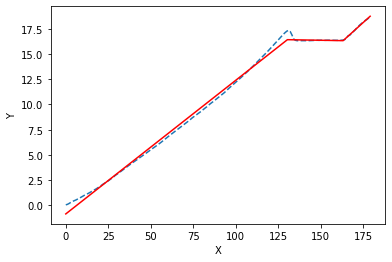

In [220]:
import matplotlib.pyplot as plt

X = np.arange(0,180)
Y = student_1_strain[1,:]
plt.plot( X, Y, '--' );

initialBreakpoints = [130,160]
plt.plot( *SegmentedLinearReg( X, Y, initialBreakpoints ), '-r' );
plt.xlabel('X'); plt.ylabel('Y')